In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = "F:\\Ml files\\Emotion detection\\Data\\"

In [3]:
data = pd.read_csv(PATH+"Bangla/BD_EMOTIONS_cleaned.csv")
data.head()

,text,emotion
0,নাইমা কর জানি,sad
1,ভাই আপনা ভাল লাগ,happy
2,গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা না,anger
3,ধন্যবাদ স্ যশোরে অনুষ্ঠান র জন্য,happy
4,বর্তমানে মুসলমান মারে যে হয় ঈশ্বর,disgust


In [4]:
data.fillna(0)

,text,emotion
0,নাইমা কর জানি,sad
1,ভাই আপনা ভাল লাগ,happy
2,গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা না,anger
3,ধন্যবাদ স্ যশোরে অনুষ্ঠান র জন্য,happy
4,বর্তমানে মুসলমান মারে যে হয় ঈশ্বর,disgust
...,...,...
14329,হেতিরে যে মন চায় ভাই সালির গাছ লা দরক n,anger
14330,হেতিরে যে মন চায় ভাই সালির গাছ লা দরক n,anger
14331,মাগি n,disgust
14332,কিস মন্রী পদক্ষেপ নিল না বড় বড় কথা বলবেননা মান...,disgust


In [5]:
data['emotion'] = data['emotion'].replace(['happy','sad','anger','disgust', 'surprise','fear', 'none'], [1,2,3,4,5,6,7])

In [6]:
data.emotion.value_counts()

1    3622
2    2710
3    2670
4    2364
5    1411
6    1347
7     210
Name: emotion, dtype: int64

In [7]:
data['text'] = data['text'].str.replace(r'\s+', ' ')

In [8]:
data.text[2]

'গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা না'

## Data Split 

## (Training : 80% and Testing 20% )

In [9]:
data.text =  data.text.apply(str)
X = data['text']
Y = data['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#checking...
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11467,)
(2867,)
(11467,)
(2867,)


In [10]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

## Model Development 

### Pipeline creation using TFIDF, One VS rest classifier and several ML models

### Multinomial Naive Bayes

In [12]:
# Define a pipeline combining a text feature extractor with multi lable classifier
from sklearn.naive_bayes import MultinomialNB
TFIDF_NB_pipeline = Pipeline([

                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=2000, min_df=1,ngram_range=(1,2))),
                
                ('clf', OneVsRestClassifier(MultinomialNB(
                    alpha=0.15,fit_prior=True, class_prior=None))),
            ])

TFIDF_NB_pipeline.fit(X_train, y_train)
TFIDF_NB_pipeline_prediction = TFIDF_NB_pipeline.predict(X_test)


print('accuracy %s' % accuracy_score(TFIDF_NB_pipeline_prediction, y_test))


accuracy 0.49319846529473316


### SGD Classifier

In [15]:
from sklearn.linear_model import SGDClassifier
TFIDF_SGD_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=13000,min_df=1,ngram_range=(1,2))),
                ('clf',OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=100, tol=None)))
            ])

TFIDF_SGD_pipeline.fit(X_train, y_train)
TFIDF_SGD_pipeline_prediction = TFIDF_SGD_pipeline.predict(X_test)


print('accuracy %s' % accuracy_score(TFIDF_SGD_pipeline_prediction, y_test))


accuracy 0.83985421


### Logistric Regeression

In [16]:
from sklearn.linear_model import LogisticRegression
TFIDF_LR_pipeline = Pipeline([

                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=5000,min_df=4,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(LogisticRegression(multi_class='ovr',solver='liblinear',C=1,random_state=42,tol=0.0001,max_iter=300)))
            ])

TFIDF_LR_pipeline.fit(X_train, y_train)
TFIDF_LR_pipeline_prediction = TFIDF_LR_pipeline.predict(X_test)


print('accuracy %s' % accuracy_score(TFIDF_LR_pipeline_prediction, y_test))

accuracy 0.84985963


### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
TFIDF_RF_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=11000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=500,criterion ='entropy')))
            ])


TFIDF_RF_pipeline.fit(X_train, y_train)
TFIDF_RF_pipeline_prediction = TFIDF_RF_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_RF_pipeline_prediction, y_test))


accuracy 0.89221593


### XGBClassifier

In [18]:
import xgboost as xgb
TFIDF_XGB_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=10000,min_df=5,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_jobs=1)))
            ])


TFIDF_XGB_pipeline.fit(X_train, y_train)
TFIDF_XGB_pipeline_prediction = TFIDF_XGB_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_XGB_pipeline_prediction, y_test))

accuracy 0.81027536


### SVC (kernel = linear) 

In [19]:
# svc linear kernel
from sklearn.svm import SVC
TFIDF_SVC_linear_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=13000,min_df=3,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(SVC(random_state=42,kernel='linear')))
            ])


TFIDF_SVC_linear_pipeline.fit(X_train, y_train)
TFIDF_SVC_linear_pipeline_prediction = TFIDF_SVC_linear_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_SVC_linear_pipeline_prediction, y_test))


accuracy 0.83601478


### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
TFIDF_DT_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=13000,min_df=3,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(random_state=43, max_depth=71)))
            ])


TFIDF_DT_pipeline.fit(X_train, y_train)
TFIDF_DT_pipeline_prediction = TFIDF_DT_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_DT_pipeline_prediction, y_test))



accuracy 0.72826935


### KNeighbors Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
TFIDF_NearestNeighbors_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=2,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=25)))
            ])


TFIDF_NearestNeighbors_pipeline.fit(X_train, y_train)
TFIDF_NearestNeighbors_pipeline_prediction = TFIDF_NearestNeighbors_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_NearestNeighbors_pipeline_prediction, y_test))



accuracy 0.55971236


### SVC (kernel = rbf) 

In [23]:
#RB SVM
from sklearn.svm import SVC
TFIDF_svc_rbf_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=2,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(SVC(random_state=42, kernel='rbf')))
            ])


TFIDF_svc_rbf_pipeline.fit(X_train, y_train)
TFIDF_svc_rbf_pipeline_prediction = TFIDF_svc_rbf_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_svc_rbf_pipeline_prediction, y_test))



accuracy 0.85239736


### Passive Aggressive Classifier

In [24]:
#RB PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
TFIDF_PassiveAggressive_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)))
            ])


TFIDF_PassiveAggressive_pipeline.fit(X_train, y_train)
TFIDF_PassiveAggressive_pipeline_prediction = TFIDF_PassiveAggressive_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_PassiveAggressive_pipeline_prediction, y_test))


accuracy 0.76769711


## AdaBoost Classifier

In [25]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

TFIDF_ada_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(n_estimators=100, random_state=0)))
            ])


TFIDF_ada_pipeline.fit(X_train, y_train)
TFIDF_ada_pipeline_prediction = TFIDF_ada_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_ada_pipeline_prediction, y_test))


accuracy 0.79279715


### Bagging Classifier

In [26]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
TFIDF_Bagging_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=8000,min_df=1,ngram_range=(1,2))),
                ('clf', BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=42))
            ])


TFIDF_Bagging_pipeline.fit(X_train, y_train)
TFIDF_Bagging_pipeline_prediction = TFIDF_Bagging_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_Bagging_pipeline_prediction, y_test))


accuracy 0.832899647


### Gradient Boosting Classifier

In [27]:
 #GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
TFIDF_GB_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)))
            ])


TFIDF_GB_pipeline.fit(X_train, y_train)
TFIDF_GB_pipeline_prediction = TFIDF_GB_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_GB_pipeline_prediction, y_test))


accuracy 0.772999015


### ExtraTrees Classifier

In [28]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
TFIDF_EXT_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=1,ngram_range=(1,2))),
                ('clf', ExtraTreesClassifier(n_estimators=100, random_state=42))
            ])


TFIDF_EXT_pipeline.fit(X_train, y_train)
TFIDF_EXT_pipeline_prediction = TFIDF_EXT_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_EXT_pipeline_prediction, y_test))

accuracy 0.819645201


## Result Evaluation

In [33]:
from sklearn.metrics import *
MLA = {
    'MNB' : TFIDF_NB_pipeline,
    'SGD' : TFIDF_SGD_pipeline,
    'LR' : TFIDF_LR_pipeline,
    'RF' : TFIDF_RF_pipeline,
    'XGB' : TFIDF_XGB_pipeline,
    'SVC-linear' : TFIDF_SVC_linear_pipeline,
    'DT' : TFIDF_DT_pipeline,
    'KNN' : TFIDF_NearestNeighbors_pipeline,
    'SVC-rbf' : TFIDF_svc_rbf_pipeline,
    'PAG' : TFIDF_PassiveAggressive_pipeline,
    'ADB' : TFIDF_ada_pipeline,
    'BAG' : TFIDF_Bagging_pipeline,
    'GRB' : TFIDF_GB_pipeline,
    'EXT' : TFIDF_EXT_pipeline  
}

columns = []
compare = pd.DataFrame(columns = columns)
fpr = {}
tpr = {}
thresh ={}
n_class = 3


row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted, average = 'micro')
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,Precision,Recall,F1 Score
0,LR,0.8430,0.833386,0.820118,0.820506
1,SVC-rbf,0.8423,0.832688,0.819420,0.838238
2,SGD,0.8398,0.830247,0.816979,0.842486
3,SVC-linear,0.8360,0.826410,0.813142,0.840626
4,BAG,0.8328,0.823271,0.810003,0.807292
5,RF,0.8322,0.822573,0.809305,0.818401
6,EXT,0.8196,0.810017,0.796748,0.814083
7,MNB,0.8182,0.808621,0.795353,0.789665
8,XGB,0.8102,0.800599,0.787331,0.797966
9,ADB,0.7927,0.783159,0.769891,0.787474


In [35]:
compare.to_csv(PATH+"Bangla/BD_EMOTIONS_results.csv", index = False)

In [40]:
compare = compare.head(5)

### Performance Comparison of Every Model

In [49]:
#plot performance comaparison 
def compare_plots(y_value,score):
  plt.subplots(figsize=(15,8))
  # color_palette("vlag", as_cmap=True)
  sn.barplot(x="Name", y=y_value,palette='bright',data=compare,edgecolor=sn.color_palette('dark',7))
  
  plt.tick_params(axis='x',rotation=90,labelsize=22)
  plt.tick_params(axis='y',rotation=0,labelsize=18)
  plt.title('Comparing performance with '+y_value+'.' + '(TF-IDF)', fontsize=20)
  plt.ylabel(score +' Score', fontsize=22)
  plt.xlabel('Machine Learning Algorithms', fontsize=16)
  plt.show()
  return plt


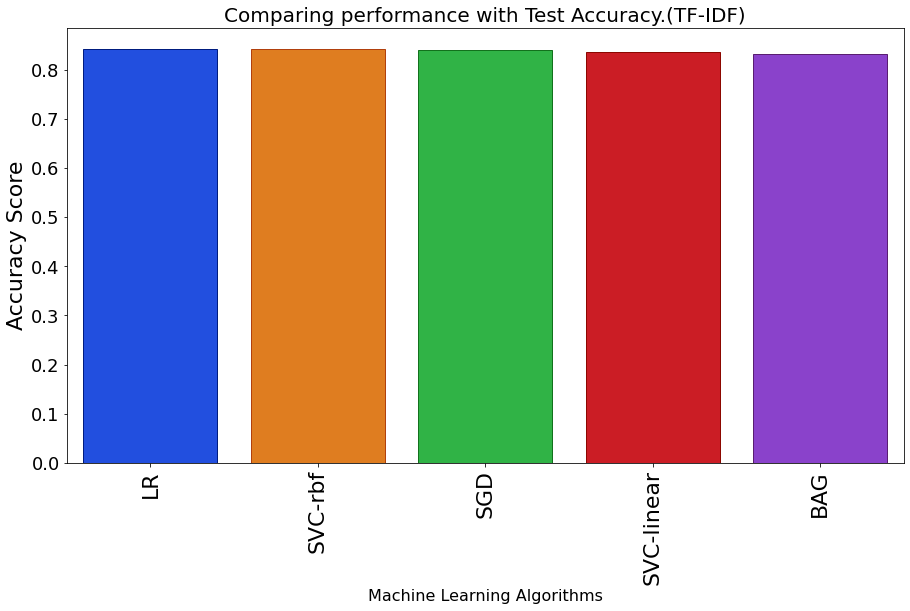

In [50]:
# Performance conparion with respect to Accuracy
compare_plots('Test Accuracy', 'Accuracy');

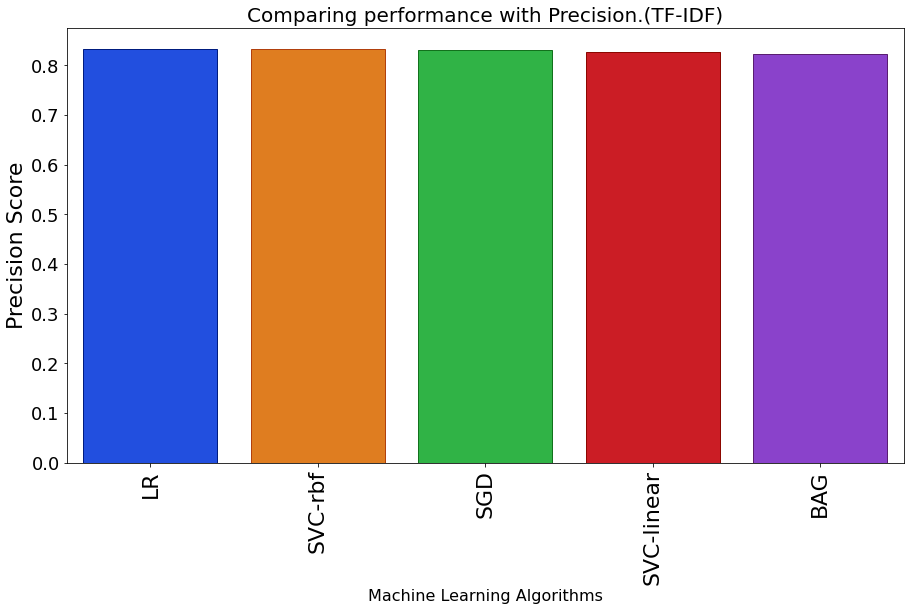

In [51]:
# Performance conparion with respect to F1 score
compare_plots('Precision', 'Precision');

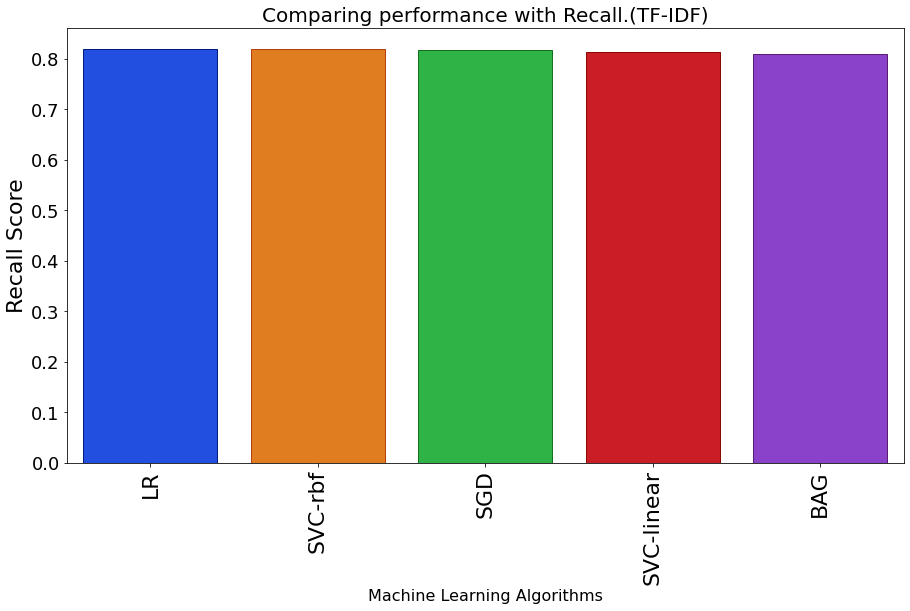

In [52]:
# Performance conparion with respect to F1 score
compare_plots('Recall', 'Recall');

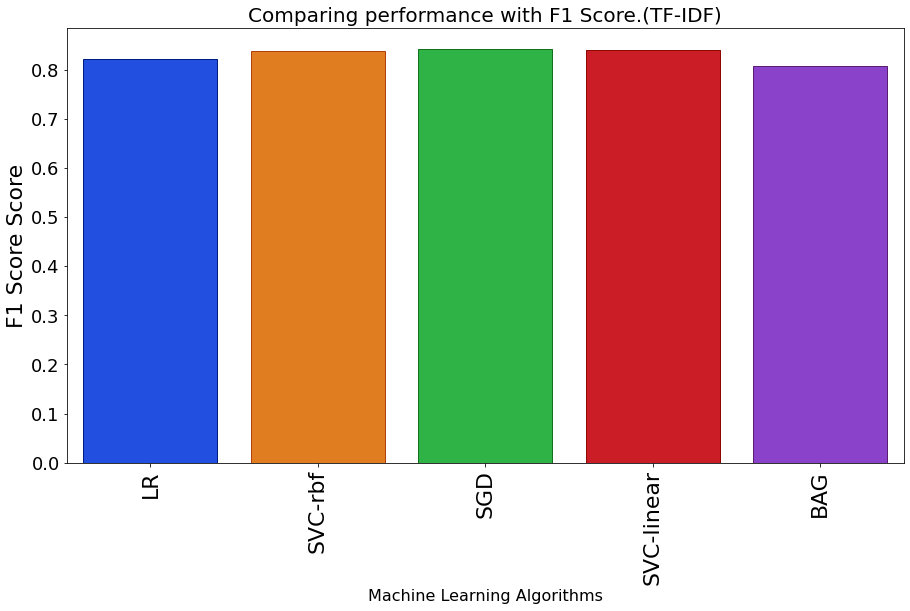

In [53]:
# Performance conparion with respect to F1 score
compare_plots('F1 Score', 'F1 Score');

## Model Validation 

### Confusion Matrix

In [54]:
def conf_matrix(pred,classfier):
  predictions = pred
  y_pred = np.array(predictions)
  cm = confusion_matrix(y_test, y_pred) 

  cm_df = pd.DataFrame(cm,
                       index = ['happy', 'sad', 'anger', 'disgust', 'surprise', 'fear', 'none'], 
                       columns = ['happy', 'sad', 'anger', 'disgust', 'surprise', 'fear', 'none'])
  plt.figure(figsize=(8,10))
  sn.heatmap(cm_df, annot=True,cmap="BuPu", fmt='g')
  plt.title('\n'+classfier+' Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
  plt.ylabel('True label',weight = 'bold',fontsize=10)
  plt.xlabel('Predicted label', weight = 'bold',fontsize=10)
  plt.tick_params(rotation=0,axis='y', labelsize=14)
  plt.tick_params(rotation=0,axis='x', labelsize=14)
  plt.xticks(rotation = 0)
  plt.yticks(rotation = 90)


  plt.show()
  plt.close()

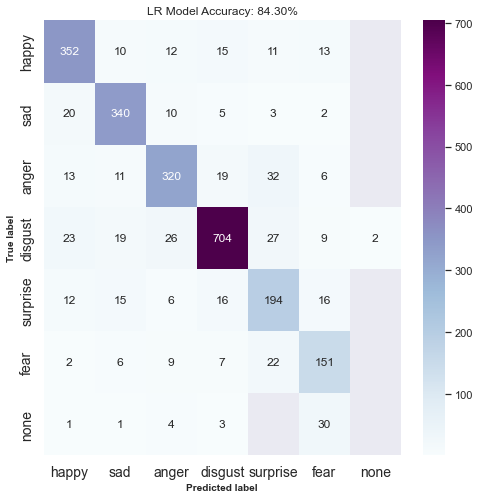

In [6]:
conf_matrix(TFIDF_LR_pipeline_prediction, 'LR Model')

Text: অনেক অনেক অভিনন্দন ও শুভকামনা জানাচ্ছি কলেজ কর্তৃপক্ষ, শিক্ষকবৃন্দ এবং শিক্ষার্থীদের।
Class: happy, Accuracy: 0.588958231999934
Class: sad, Accuracy: 0.14338325304357125
Class: anger, Accuracy: 0.08223370762807873
Class: disgust, Accuracy: 0.07502825234412437
Class: fear, Accuracy: 0.053321688942229065
Class: surprise, Accuracy: 0.050835094795969246
Class: none, Accuracy: 0.006239771246093219



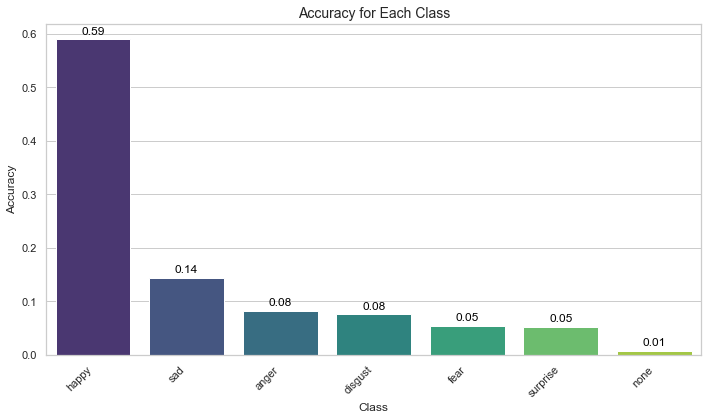

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
TFIDF_LR_pipeline = Pipeline([

                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=5000,min_df=4,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(LogisticRegression(multi_class='ovr',solver='liblinear',C=1,random_state=42,tol=0.0001,max_iter=300)))
            ])

TFIDF_LR_pipeline.fit(X_train, y_train)
TFIDF_LR_pipeline_prediction = TFIDF_LR_pipeline.predict(X_test)

test_texts = ["অনেক অনেক অভিনন্দন ও শুভকামনা জানাচ্ছি কলেজ কর্তৃপক্ষ, শিক্ষকবৃন্দ এবং শিক্ষার্থীদের।"]
probabilities = TFIDF_LR_pipeline.predict_proba(test_texts)

# Get the class labels from the pipeline
class_labels= ['happy', 'sad', 'anger', 'disgust', 'surprise', 'fear', 'none']


# Iterate over the test texts and print the accuracy of each class
for i in range(len(test_texts)):
    text = test_texts[i]
    probabilities_for_text = probabilities[i]
    sorted_probabilities = sorted(zip(class_labels, probabilities_for_text), key=lambda x: x[1], reverse=True)
    
    print(f"Text: {text}")
    for class_label, probability in sorted_probabilities:
        print(f"Class: {class_label}, Accuracy: {probability}")
    print()

# Sort the probabilities in descending order
sorted_probabilities = sorted(zip(class_labels, probabilities[0]), key=lambda x: x[1], reverse=True)

# Extract the class labels and probabilities from the sorted list
class_labels = [item[0] for item in sorted_probabilities]
accuracy = [item[1] for item in sorted_probabilities]

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_labels, y=accuracy, palette='viridis')

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Each Class', fontsize=14)

# Customize tick labels and rotation
ax.set_xticklabels(class_labels, rotation=45, ha='right')

# Add value labels to the bars
for i, v in enumerate(accuracy):
    ax.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


Text: সময় ফুরিয়ে গেলে সবাইকে চলে যেতে হবে, এটাই নিয়ম, ধ্রুব সত্য। কেউ মৃত্যুকে কোনো কিছুর বিনিময়ে আটকাতে পারবে না৷ মৃত্যু সবার নাগাল পাবেই।
Class: sad, Accuracy: 0.30081435259604555
Class: fear, Accuracy: 0.20396012590872767
Class: happy, Accuracy: 0.19569114367389778
Class: anger, Accuracy: 0.12725221459929123
Class: surprise, Accuracy: 0.08995017253589545
Class: disgust, Accuracy: 0.07476884923485397
Class: none, Accuracy: 0.0075631414512883285



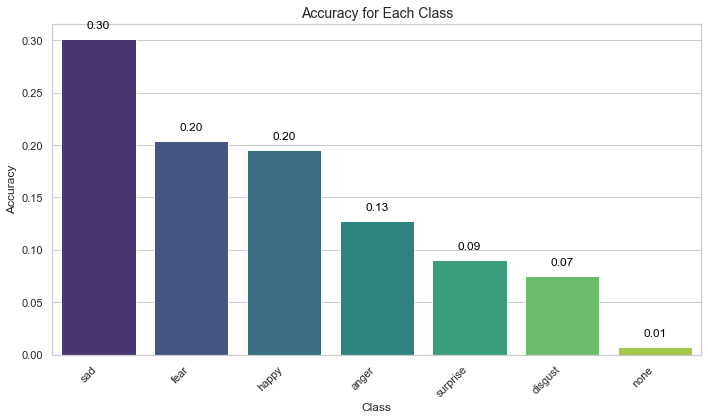

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
TFIDF_LR_pipeline = Pipeline([

                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=5000,min_df=4,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(LogisticRegression(multi_class='ovr',solver='liblinear',C=1,random_state=42,tol=0.0001,max_iter=300)))
            ])

TFIDF_LR_pipeline.fit(X_train, y_train)
TFIDF_LR_pipeline_prediction = TFIDF_LR_pipeline.predict(X_test)

test_texts = ["সময় ফুরিয়ে গেলে সবাইকে চলে যেতে হবে, এটাই নিয়ম, ধ্রুব সত্য। কেউ মৃত্যুকে কোনো কিছুর বিনিময়ে আটকাতে পারবে না৷ মৃত্যু সবার নাগাল পাবেই।"]
probabilities = TFIDF_LR_pipeline.predict_proba(test_texts)

# Get the class labels from the pipeline
class_labels= ['happy', 'sad', 'anger', 'disgust', 'surprise', 'fear', 'none']


# Iterate over the test texts and print the accuracy of each class
for i in range(len(test_texts)):
    text = test_texts[i]
    probabilities_for_text = probabilities[i]
    sorted_probabilities = sorted(zip(class_labels, probabilities_for_text), key=lambda x: x[1], reverse=True)
    
    print(f"Text: {text}")
    for class_label, probability in sorted_probabilities:
        print(f"Class: {class_label}, Accuracy: {probability}")
    print()

# Sort the probabilities in descending order
sorted_probabilities = sorted(zip(class_labels, probabilities[0]), key=lambda x: x[1], reverse=True)

# Extract the class labels and probabilities from the sorted list
class_labels = [item[0] for item in sorted_probabilities]
accuracy = [item[1] for item in sorted_probabilities]

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_labels, y=accuracy, palette='viridis')

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Each Class', fontsize=14)

# Customize tick labels and rotation
ax.set_xticklabels(class_labels, rotation=45, ha='right')

# Add value labels to the bars
for i, v in enumerate(accuracy):
    ax.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')

# Show the plot
plt.tight_layout()
plt.show()
